In [ ]:
import yfinance as yf

# Set the stock symbol and start and end dates
symbol = "SBIN.NS"
start_date = "2000-01-01"
end_date = "2023-04-10"

# Download the stock data as a pandas dataframe
data = yf.download(symbol, start=start_date, end=end_date)

# Save the data to a CSV file
data.to_csv("SBIN.csv")


[*********************100%***********************]  1 of 1 completed


In [ ]:
import pandas as pd

# Read the CSV file into a pandas dataframe
sbin = pd.read_csv("SBIN.csv")

# Print the first five rows of the dataframe
print(sbin.head())


         Date       Open       High        Low      Close  Adj Close    Volume
0  2000-01-03  22.267092  22.988886  22.101974  22.988886  16.423578  25152894
1  2000-01-04  22.988886  24.720245  22.535995  24.446625  17.465002  47648560
2  2000-01-05  23.493668  24.974997  23.116261  23.441774  16.747129  36396207
3  2000-01-06  23.776726  25.286358  23.776726  24.625893  17.593081  70573968
4  2000-01-07  24.673071  26.409147  24.059780  25.786425  18.422178  83453217


In [ ]:
sbin = pd.read_csv('SBIN.csv', parse_dates=['Date'])
sbin = sbin.set_index('Date')


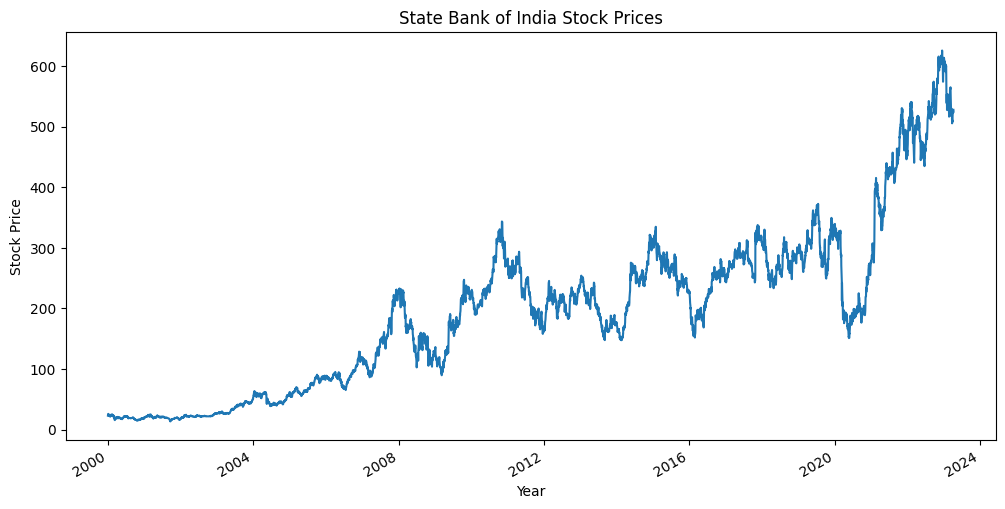

In [ ]:
sbin['Close'].plot(figsize=(12,6), title='State Bank of India Stock Prices')
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.show()


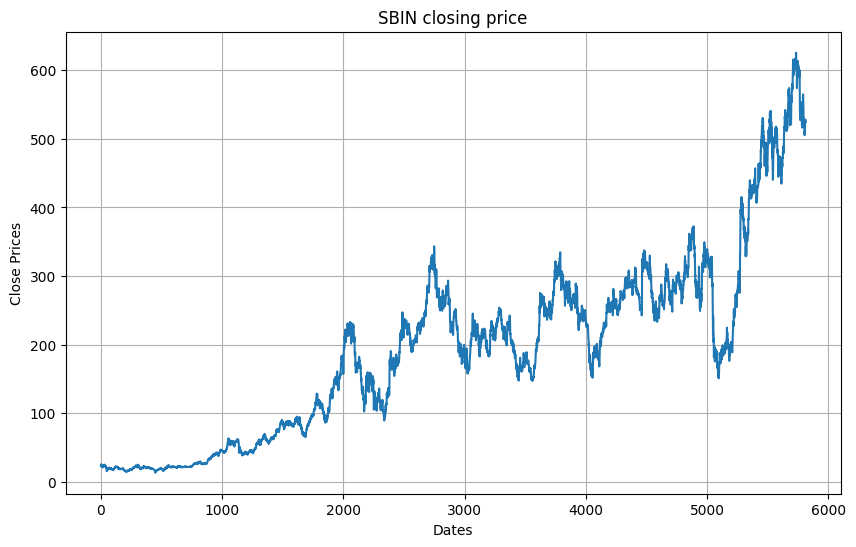

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(sbin['Close'])
plt.title('SBIN closing price')
plt.show()

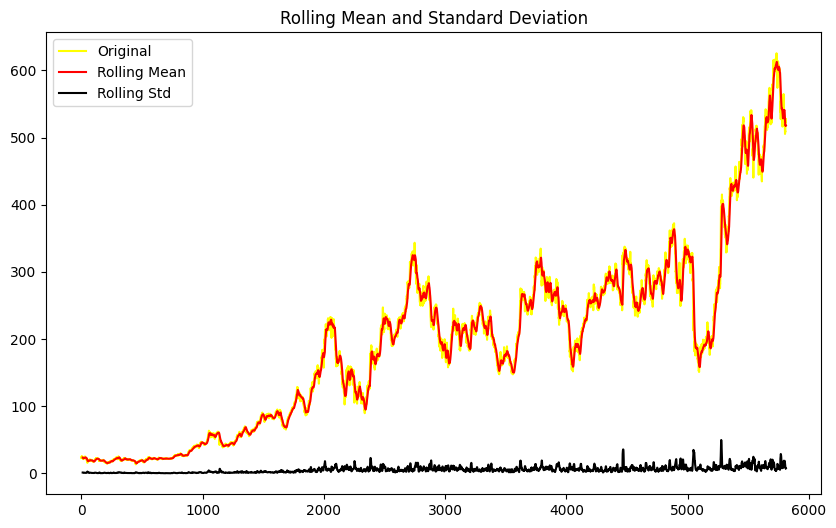

Results of dickey fuller test
Test Statistics                  -0.610446
p-value                           0.868604
No. of lags used                 27.000000
Number of observations used    5783.000000
critical value (1%)              -3.431481
critical value (5%)              -2.862040
critical value (10%)             -2.567036
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='yellow',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

test_stationarity(sbin['Close'])

<Axes: ylabel='Density'>

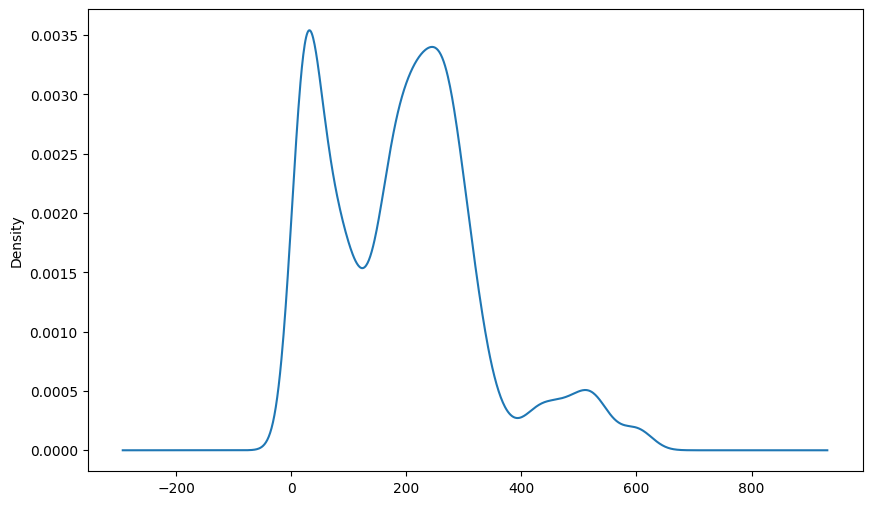

In [ ]:
#Distribution of the dataset
df_close = sbin['Close']
df_close.plot(kind='kde')

In [ ]:
sbin.sort_index(inplace=True)

<Figure size 1000x600 with 0 Axes>

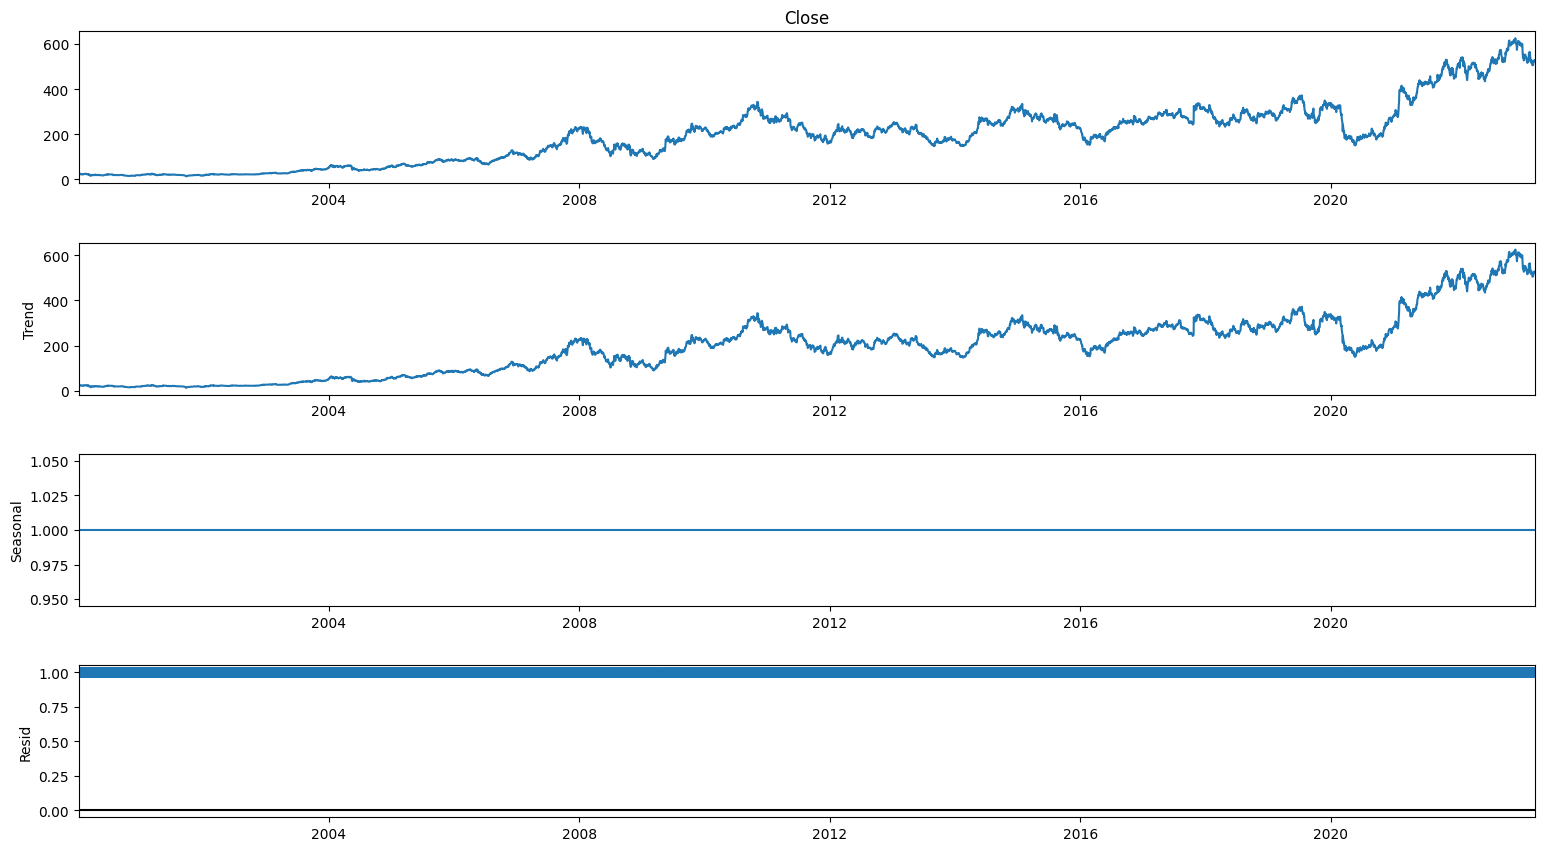

In [ ]:
result = seasonal_decompose(sbin['Close'],model='multiplicative', period=1)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

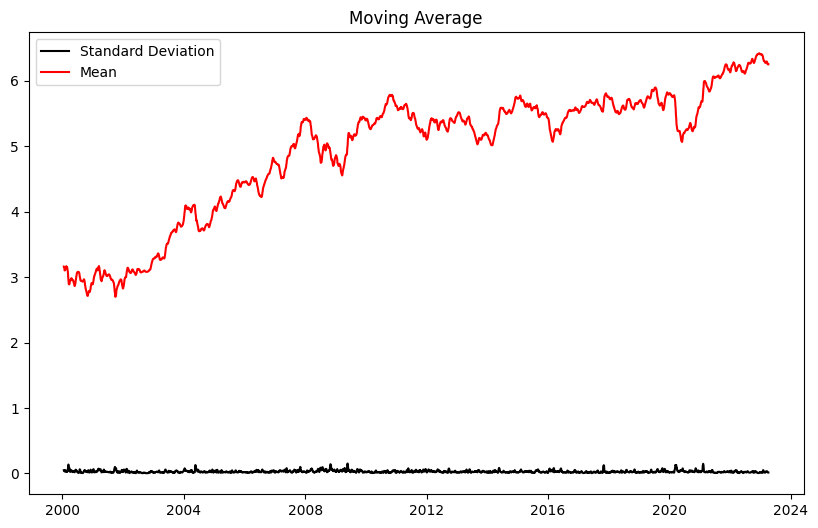

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(sbin['Close'])
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

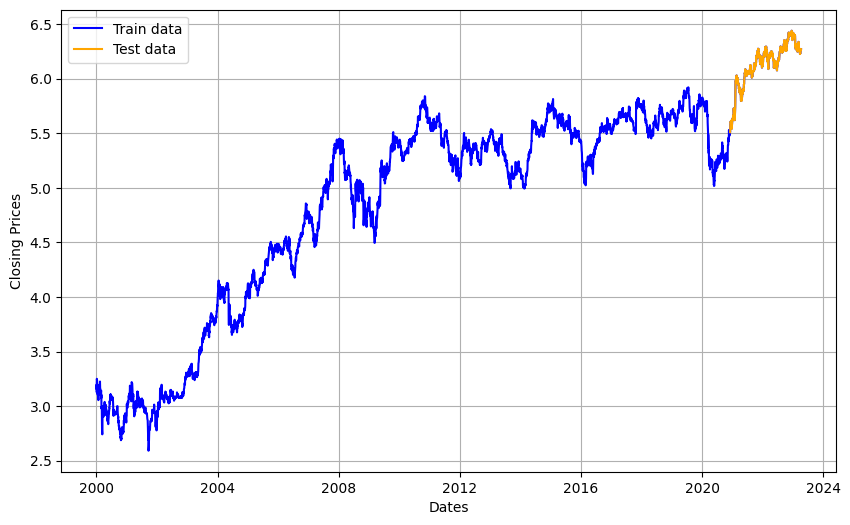

In [ ]:
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'blue', label='Train data')
plt.plot(test_data, 'orange', label='Test data')
plt.legend()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-24313.541, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-24328.985, Time=0.58 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-24329.637, Time=1.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-24313.709, Time=0.21 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-24328.930, Time=0.96 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-24329.029, Time=1.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-24327.600, Time=2.86 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-24329.989, Time=0.87 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-24329.244, Time=0.48 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-24329.334, Time=1.46 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-24329.349, Time=0.51 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-24328.024, Time=1.88 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 12.857 seconds
                               SARIMAX Results                 

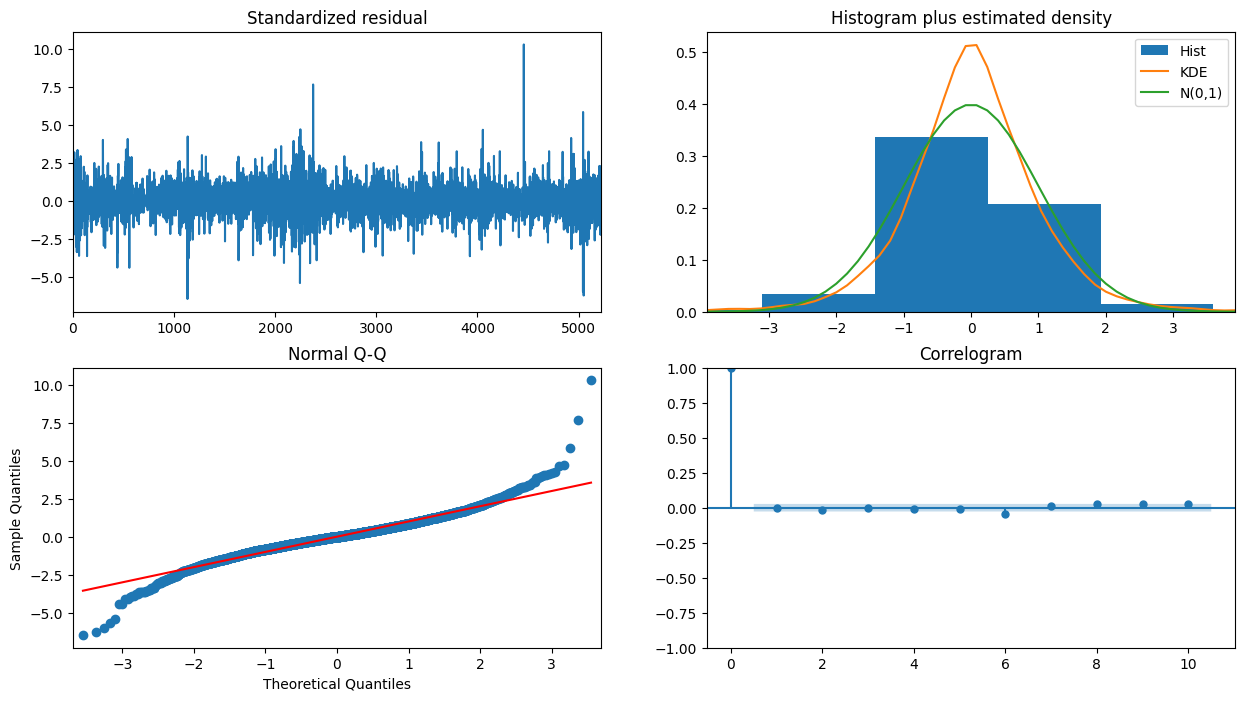

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
import statsmodels.api as sm


In [ ]:
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
# model = sm.tsa.arima.ARIMA(train_data, order=(3,1,2))
# model = ARIMA(train_data, order=(0,1,1))
model = ARIMA(train_data, order=(3, 1, 2))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 5226
Model:                 ARIMA(3, 1, 2)   Log Likelihood               12167.692
Date:                Wed, 26 Apr 2023   AIC                         -24323.383
Time:                        11:47:23   BIC                         -24284.016
Sample:                             0   HQIC                        -24309.617
                               - 5226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0298      0.052      0.576      0.564      -0.071       0.131
ar.L2         -0.0089      0.539     -0.017      0.987      -1.066       1.048
ar.L3         -0.0024      0.032     -0.075      0.9

In [ ]:
fc=fitted.forecast(519,alpha=0.05) 

In [ ]:
forecast=fc

In [ ]:
forecast_values = fitted.forecast(steps=520)
print(forecast_values)
print(type(forecast_values))
print(forecast_values.shape)


5226    5.514627
5227    5.514384
5228    5.514331
5229    5.514330
5230    5.514331
          ...   
5741    5.514331
5742    5.514331
5743    5.514331
5744    5.514331
5745    5.514331
Name: predicted_mean, Length: 520, dtype: float64
<class 'pandas.core.series.Series'>
(520,)


In [ ]:
predicted_values = forecast_values.values


In [ ]:
len(forecast_values)


10

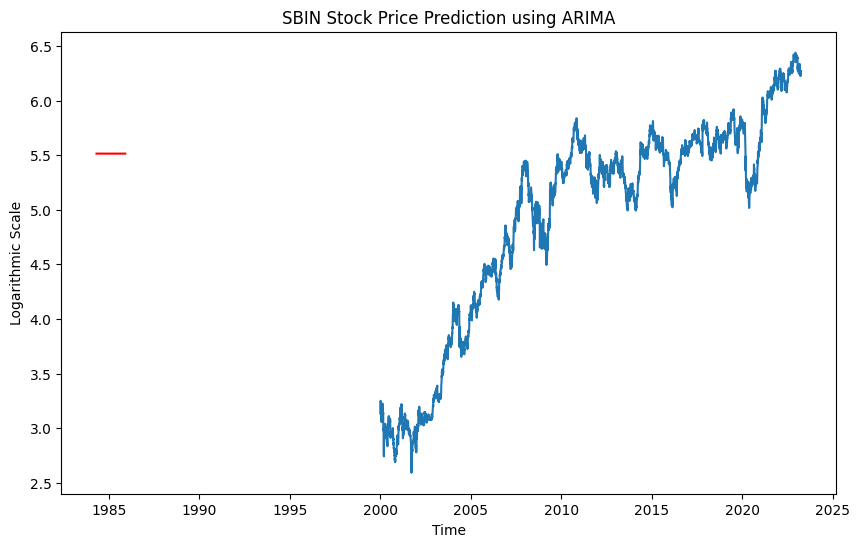

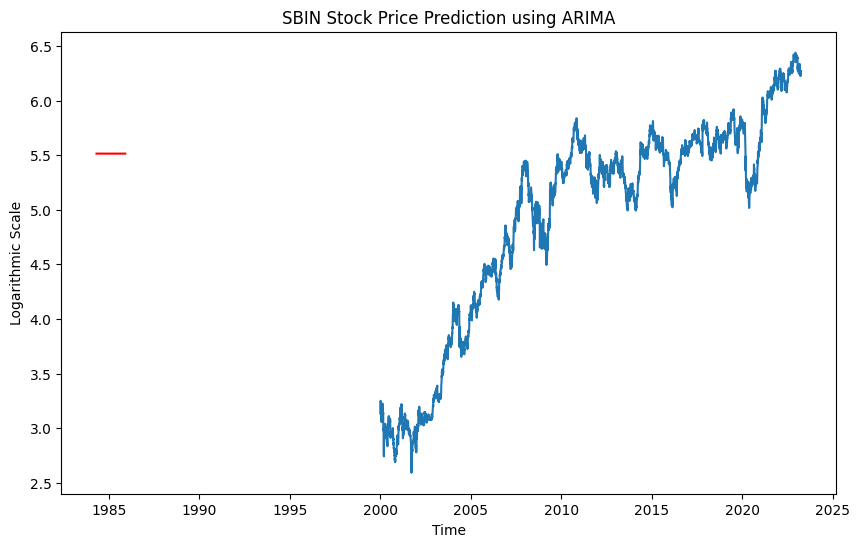

In [ ]:
# Get the forecasted values
forecast_values = fitted.forecast(steps=582)

# Plot the predicted values along with the original data
plt.plot(df_log)
plt.plot(forecast_values, color='red')
plt.title('SBIN Stock Price Prediction using ARIMA')
plt.xlabel('Time')
plt.ylabel('Logarithmic Scale')
plt.show()


plt.plot(df_log)
plt.plot(forecast_values, color='red')
plt.title('SBIN Stock Price Prediction using ARIMA')
plt.xlabel('Time')
plt.ylabel('Logarithmic Scale')
plt.show()


In [ ]:
train_data_org=np.exp(train_data)
test_data_orig = np.exp(test_data)
forecast_values_orig = np.exp(forecast_values)

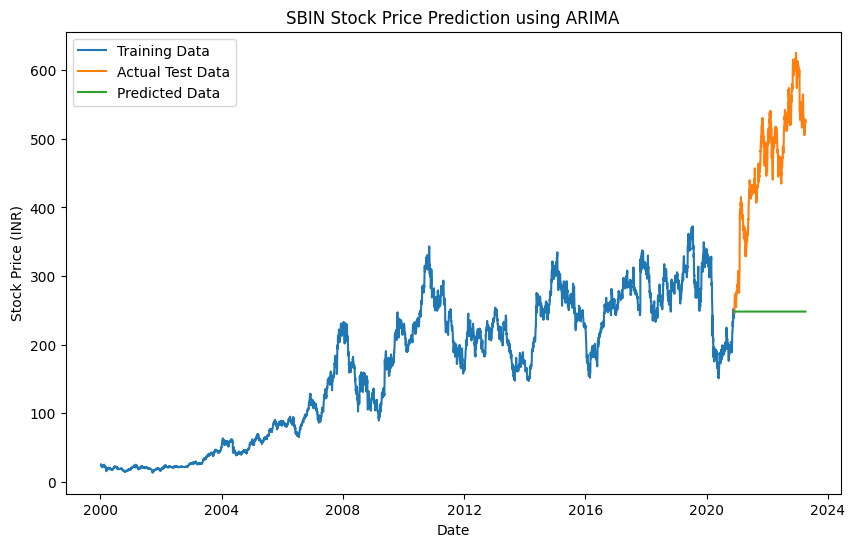

In [ ]:
plt.plot(train_data.index, train_data_org.values, label='Training Data')
plt.plot(test_data.index, test_data_orig.values, label='Actual Test Data')
# plt.plot(forecast_values_orig, color='green',label='Predicted Data')
plt.plot(test_data.index[-len(forecast_values):], forecast_values_orig, label='Predicted Data')
plt.xlabel('Date')
plt.ylabel('Stock Price (INR)')
plt.title('SBIN Stock Price Prediction using ARIMA')
plt.legend()
plt.show()

In [ ]:
# train_data_org=np.exp(train_data)
test_data = test_data_orig
forecast_values = forecast_values_orig

In [ ]:
model=fitted

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

print("ARIMA\n")
# Mean Absolute Error
mae = mean_absolute_error(test_data, forecast_values)
print('Mean Absolute Error:', mae)

# Mean Absolute Percentage Error
mape = np.mean(np.abs((test_data - forecast_values) / test_data)) * 100
print('Mean Absolute Percentage Error:', mape)

# Mean Squared Error
mse = mean_squared_error(test_data, forecast_values)
print('Mean Squared Error:', mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Akaike information criterion
aic = model.aic
print('Akaike information criterion:', aic)
# model = ExponentialSmoothing(train_data, trend="add", seasonal="add", seasonal_periods=12)
# fitted = model.fit()
# aic_value = fitted.aic
# print('Akaike information criterion:',aic_value)


# R-Squared
r2 = r2_score(test_data, forecast_values)
print('R-Squared:', r2)

# Normalized Root Mean Squared Error
nrmse = rmse / (test_data.max() - test_data.min())
print('Normalized Root Mean Squared Error:', nrmse)

# Weighted Absolute Percentage Error
wape = np.sum(np.abs(test_data - forecast_values)) / np.sum(np.abs(test_data))
print('Weighted Absolute Percentage Error:', wape)

# Weighted Mean Absolute Percentage Error
wmape = np.sum(np.abs(test_data - forecast_values) / np.sum(np.abs(test_data)))
print('Weighted Mean Absolute Percentage Error:', wmape)


ARIMA

Mean Absolute Error: 222.0949510061853
Mean Absolute Percentage Error: nan
Mean Squared Error: 56621.851342129434
Root Mean Squared Error: 237.9534646567043
Akaike information criterion: -39132.89071600972
R-Squared: -6.7588897369918
Normalized Root Mean Squared Error: 0.62859189734089
Weighted Absolute Percentage Error: 0.0
Weighted Mean Absolute Percentage Error: 0.0


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [ ]:
df = pd.read_csv('SBIN.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
# df = df.resample('D').ffill()  # Resample data to daily frequency and forward fill missing values
# df_log = np.log(df['Close'])

In [ ]:
# Extract the closing price column
close_price = df['Close']

In [ ]:
# Split the dataset into train and test sets
train_data = close_price[:int(len(close_price)*0.9)]
test_data = close_price[int(len(close_price)*0.9):]

In [ ]:

# Build SARIMA model
model = sm.tsa.statespace.SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
fitted = model.fit()

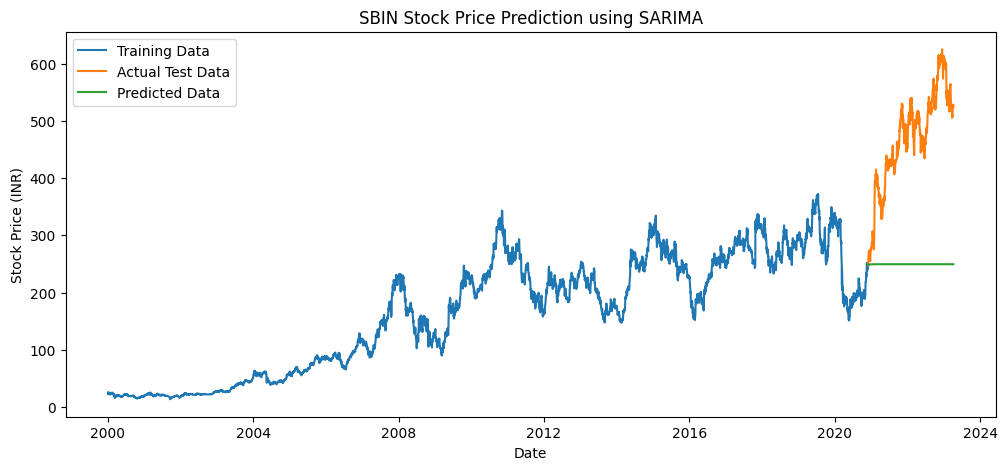

In [ ]:
# Forecast the future values
forecast_values = fitted.forecast(steps=len(test_data))

# Plot the actual and predicted values
plt.figure(figsize=(12,5))
plt.plot(train_data.index, train_data.values, label='Training Data')
plt.plot(test_data.index, test_data.values, label='Actual Test Data')
plt.plot(test_data.index, forecast_values, label='Predicted Data')
plt.xlabel('Date')
plt.ylabel('Stock Price (INR)')
plt.title('SBIN Stock Price Prediction using SARIMA')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

print("SARIMA\n")
# Mean Absolute Error
mae = mean_absolute_error(test_data, forecast_values)
print('Mean Absolute Error:', mae)

# Mean Absolute Percentage Error
mape = np.mean(np.abs((test_data - forecast_values) / test_data)) * 100
print('Mean Absolute Percentage Error:', mape)

# Mean Squared Error
mse = mean_squared_error(test_data, forecast_values)
print('Mean Squared Error:', mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Akaike information criterion
aic = fitted.aic
print('Akaike information criterion:', aic)
# model = ExponentialSmoothing(train_data, trend="add", seasonal="add", seasonal_periods=12)
# fitted = model.fit()
# aic_value = fitted.aic
# print('Akaike information criterion:',aic_value)


# R-Squared
r2 = r2_score(test_data, forecast_values)
print('R-Squared:', r2)

# Normalized Root Mean Squared Error
nrmse = rmse / (test_data.max() - test_data.min())
print('Normalized Root Mean Squared Error:', nrmse)

# Weighted Absolute Percentage Error
wape = np.sum(np.abs(test_data - forecast_values)) / np.sum(np.abs(test_data))
print('Weighted Absolute Percentage Error:', wape)

# Weighted Mean Absolute Percentage Error
wmape = np.sum(np.abs(test_data - forecast_values) / np.sum(np.abs(test_data)))
print('Weighted Mean Absolute Percentage Error:', wmape)


SARIMA

Mean Absolute Error: 220.89933784823378
Mean Absolute Percentage Error: nan
Mean Squared Error: 56084.069791539696
Root Mean Squared Error: 236.82075456247432
Akaike information criterion: 30020.963326983874
R-Squared: -6.685197555356799
Normalized Root Mean Squared Error: 0.6255996635934372
Weighted Absolute Percentage Error: 0.0
Weighted Mean Absolute Percentage Error: 0.0


In [ ]:
SBIN Stock Price Prediction using

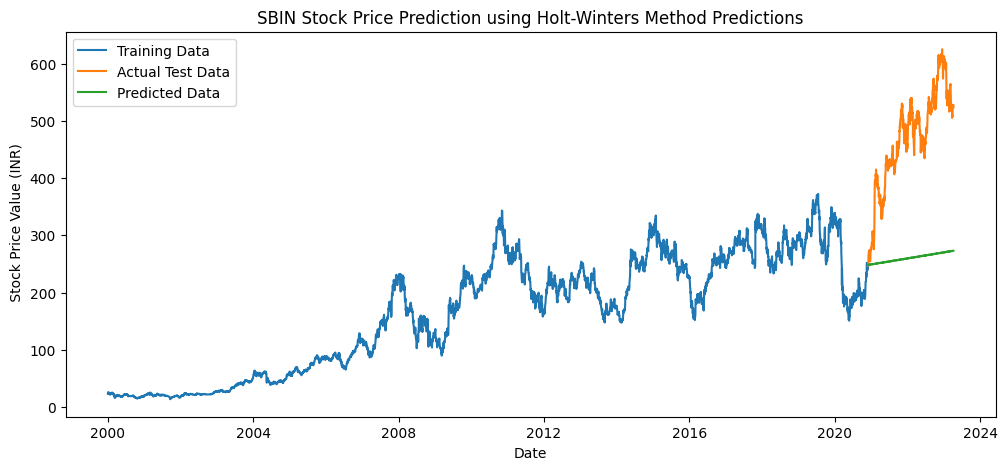

In [ ]:
# Apply Holt-Winters method
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train_data, seasonal_periods=12, trend='add', seasonal='add')
fitted = model.fit()

# Predict the values for the test set
forecast_values = fitted.forecast(len(test_data))

# Plot the actual vs predicted values
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Actual Test Data')
plt.plot(test_data.index, forecast_values, label='Predicted Data')
plt.xlabel('Date')
plt.ylabel(' Stock Price Value (INR)')
plt.title('SBIN Stock Price Prediction using Holt-Winters Method Predictions')
plt.legend()
plt.show()







In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score
# Mean Absolute Error
mae = mean_absolute_error(test_data, forecast_values)
print('Mean Absolute Error:', mae)

# Mean Absolute Percentage Error
mape = np.mean(np.abs((test_data - forecast_values) / test_data)) * 100
print('Mean Absolute Percentage Error:', mape)

# Mean Squared Error
mse = mean_squared_error(test_data, forecast_values)
print('Mean Squared Error:', mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Akaike information criterion
# aic = model.aic
# print('Akaike information criterion:', aic)
model = ExponentialSmoothing(train_data, trend="add", seasonal="add", seasonal_periods=12)
fitted = model.fit()
aic_value = fitted.aic
print('Akaike information criterion:',aic_value)


# R-Squared
r2 = r2_score(test_data, forecast_values)
print('R-Squared:', r2)

# Normalized Root Mean Squared Error
nrmse = rmse / (test_data.max() - test_data.min())
print('Normalized Root Mean Squared Error:', nrmse)

# Weighted Absolute Percentage Error
wape = np.sum(np.abs(test_data - forecast_values)) / np.sum(np.abs(test_data))
print('Weighted Absolute Percentage Error:', wape)

# Weighted Mean Absolute Percentage Error
wmape = np.sum(np.abs(test_data - forecast_values) / np.sum(np.abs(test_data)))
print('Weighted Mean Absolute Percentage Error:', wmape)


Mean Absolute Error: 209.66882417749835
Mean Absolute Percentage Error: nan
Mean Squared Error: 50230.35068212381
Root Mean Squared Error: 224.12128565159492
Akaike information criterion: 15228.67692580461
R-Squared: -5.883062689669597
Normalized Root Mean Squared Error: 0.5920519980050075
Weighted Absolute Percentage Error: 0.0
Weighted Mean Absolute Percentage Error: 0.0


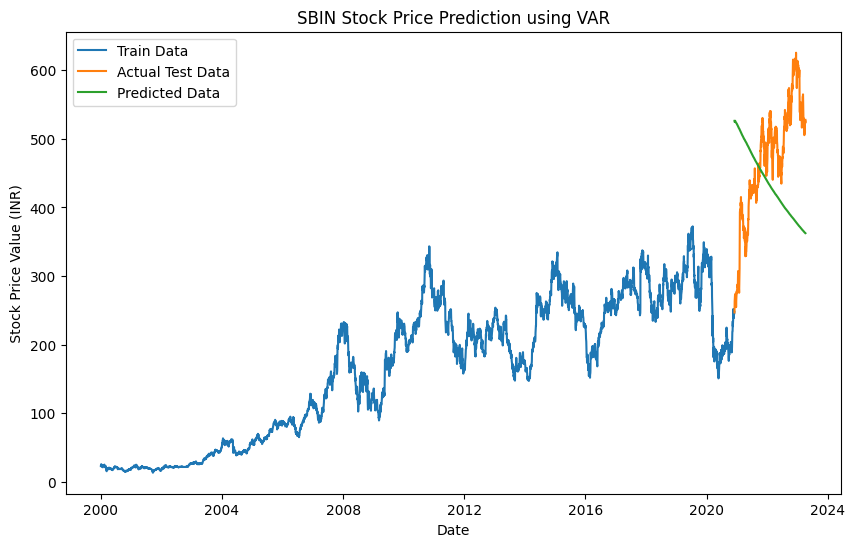

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.vector_ar.vecm import VECM

# Load data
df = pd.read_csv('SBIN.csv')

# Set date column as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Define endog and exog variables
endog = df[['Open', 'High', 'Low', 'Close']]
exog = df['Volume']

# Split data into train and test sets
train_data = endog[:int(len(df)*0.9)]
test_data = endog[int(len(df)*0.9):]

# Fitting the VAR model on the training data
model = VAR(train_data)
results = model.fit(maxlags=15, ic='aic')

# Forecasting for the test data using the VAR model
lag_order = results.k_ar
forecast_values = results.forecast(test_data.values, steps=len(test_data))

# Creating a DataFrame of the forecasted values
forecast_df = pd.DataFrame(forecast_values, index=test_data.index, columns=test_data.columns)

# Plotting the actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data['Close'], label='Train Data')
plt.plot(test_data['Close'], label='Actual Test Data')
plt.plot(forecast_df['Close'], label='Predicted Data')
plt.legend(loc='best')
plt.title('SBIN Stock Price Prediction using VAR')
plt.xlabel('Date')
plt.ylabel(' Stock Price Value (INR) ')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score

print("VAR")
print()
# Mean Absolute Error
mae = mean_absolute_error(test_data, forecast_values)
print('Mean Absolute Error:', mae)

# Mean Absolute Percentage Error
mape = np.mean(np.abs((test_data - forecast_values) / test_data)) * 100
print('Mean Absolute Percentage Error:', mape)

# Mean Squared Error
mse = mean_squared_error(test_data, forecast_values)
print('Mean Squared Error:', mse)

# Root Mean Squared Error
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Get AIC value
aic = results.info_criteria['aic']
print("AIC:", aic)


# R-Squared
r2 = r2_score(test_data, forecast_values)
print('R-Squared:', r2)

# Normalized Root Mean Squared Error
nrmse = rmse / (test_data.max() - test_data.min())
print('Normalized Root Mean Squared Error:', nrmse)

# Weighted Absolute Percentage Error
wape = np.sum(np.abs(test_data - forecast_values)) / np.sum(np.abs(test_data))
print('Weighted Absolute Percentage Error:', wape)

# Weighted Mean Absolute Percentage Error
wmape = np.sum(np.abs(test_data - forecast_values) / np.sum(np.abs(test_data)))
print('Weighted Mean Absolute Percentage Error:', wmape)


VAR

Mean Absolute Error: 114.45531124241083
Mean Absolute Percentage Error: Open     26.001008
High     25.792040
Low      26.132023
Close    25.925753
dtype: float64
Mean Squared Error: 18192.861862639595
Root Mean Squared Error: 134.88091734059194
AIC: 6.135268953351094
R-Squared: -1.4795634785434602
Normalized Root Mean Squared Error: Open     0.357585
High     0.356168
Low      0.361224
Close    0.356309
dtype: float64
Weighted Absolute Percentage Error: Open     0.243446
High     0.241806
Low      0.244781
Close    0.243280
dtype: float64
Weighted Mean Absolute Percentage Error: Open     0.243446
High     0.241806
Low      0.244781
Close    0.243280
dtype: float64


In [ ]:
!pip install fbprophet
!pip install pystan==2.19.1.1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for fbprophet
  Running setup.py clean for fbprophet
Failed to build fbprophet
  error: subprocess-exited-with-error
  
  × Running setup.py install for fbprophet did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Running setup.py install for fbprophet ... error
error: legacy-install-failure

× Encountered error while trying to install package.
╰─> fbprophet

note: This is an issue with the package mentioned above, not pip.
hint: See

In [ ]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('SBIN.csv')

# Rename columns to 'ds' and 'y'
df = df.rename(columns={'Date': 'ds', 'Close': 'y'})

# Create and fit the model
m = Prophet()
m.fit(df)

# Create future dates to make predictions for
future = m.make_future_dataframe(periods=30)

# Make predictions
forecast = m.predict(future)

# Plot the results
m.plot(forecast)
plt.show()


ModuleNotFoundError: ignored